In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
import statsmodels.api as sm

In [46]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

Task 4A

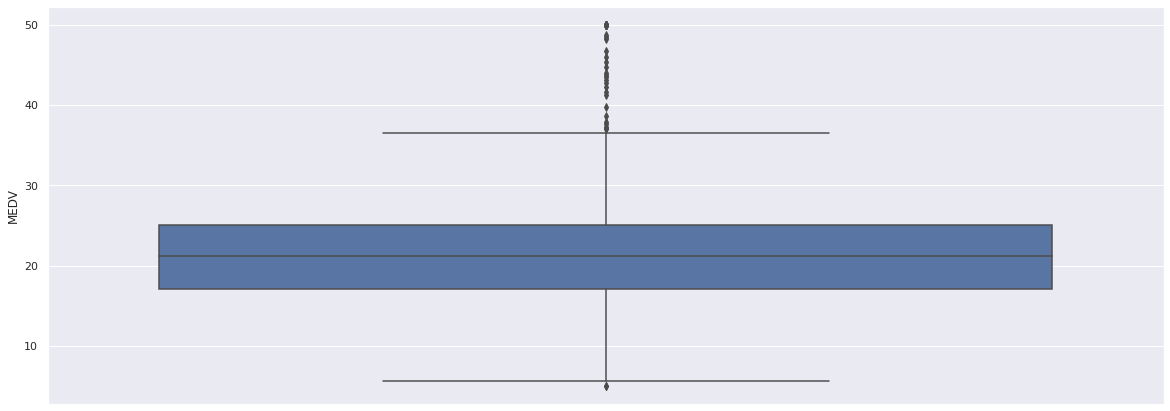

In [47]:
fourA = sns.boxplot(y='MEDV', data=boston_df)

In [48]:
boston_df.MEDV.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

Median value of owner-occupied homes is 21200$, maximal is 50000

Task 4B

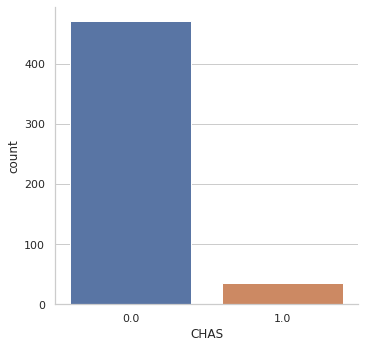

In [49]:
sns.set(style="whitegrid")
sns.catplot(x='CHAS', kind='count', data=boston_df)

Task 4C

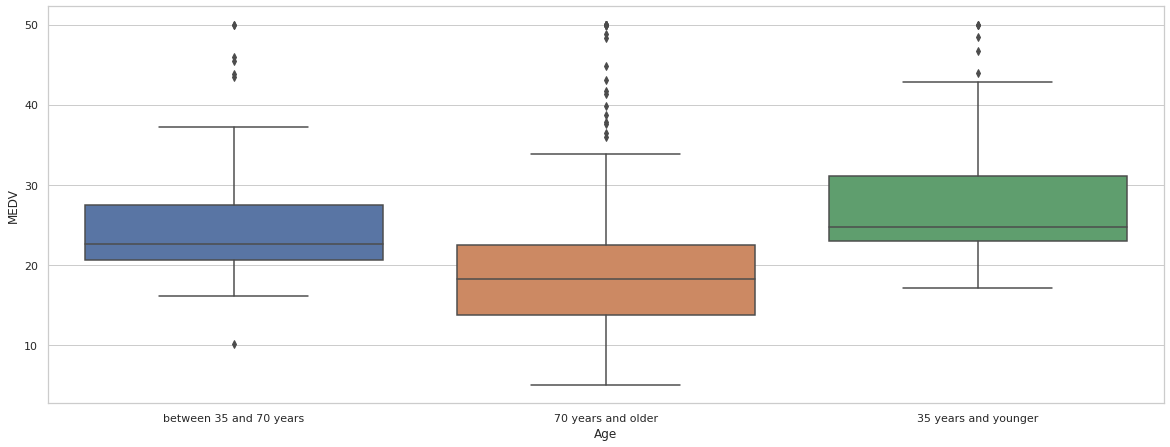

In [50]:
conditions = [
    (boston_df['AGE'] <= 35),
    (boston_df['AGE'] > 35) & (boston_df['AGE'] < 70),
    (boston_df['AGE'] >= 70)
    ]
v = ['35 years and younger', 'between 35 and 70 years', '70 years and older']
boston_df['Age'] = np.select(conditions, v)
xy = sns.boxplot(x="Age", y='MEDV', data=boston_df)
sns.set(rc={'figure.figsize':(20,7.30)})

We can see that younger people have a higher MEDV value, and older people have lower MEDV value

Task 4D

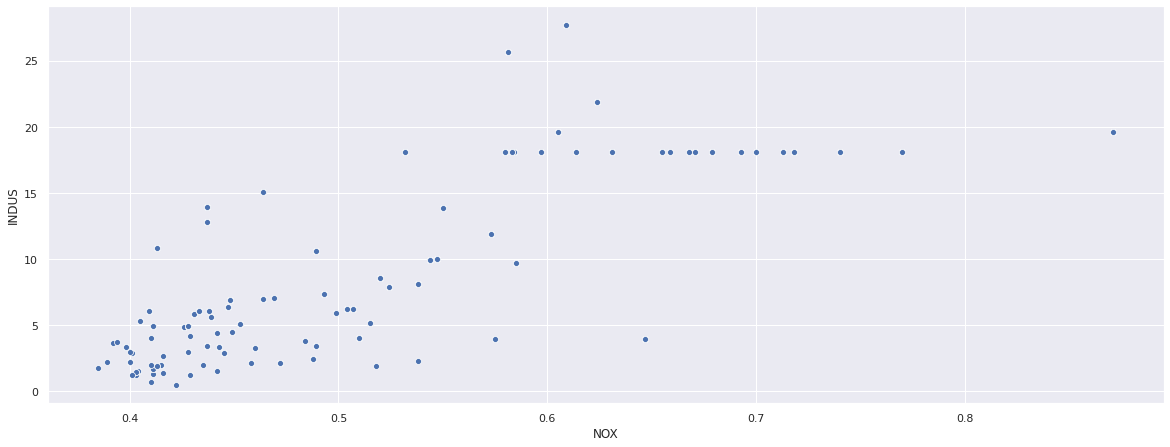

In [51]:
xxy = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)

When NOX is high, INDUS variables are also becomming higher.

Task 4E

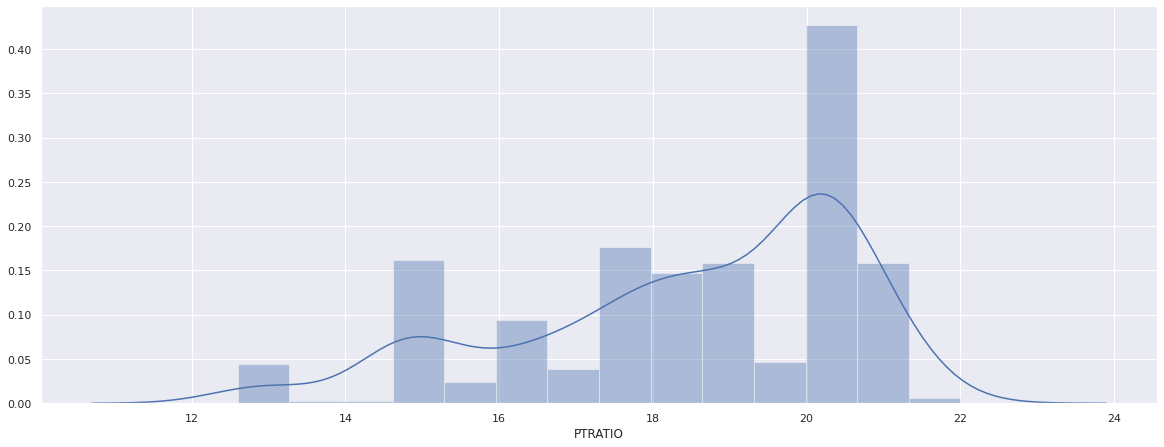

In [52]:
xxxy = sns.distplot(boston_df['PTRATIO'],kde = True)

We can see that most teachers have 21 students.

Task 5A

1)State your hypothesis 

Let's consider 2 variants:

v1: there is a significant difference in median value of houses bounded by the Charles river 


v2: there is not a significant difference in median value of houses bounded by the Charles river
We will use Levens test to find the answer

In [53]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='median')

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

Because p<0,05, we reject the null hypothesis, that's why there is a significant difference in median value of houses bounded by the Charles river.

Task 5B



In [54]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['AGE'], center='median')

LeveneResult(statistic=28.36014840190352, pvalue=1.520030055932292e-07)

Because p<0,05 we reject the null hypothesis

Task 5C

State your hypothesis

Let's consider 2 variants:

v1: there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

v2: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [55]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209149, 7.913361061240043e-98)

Because p<0,05 we reject the null hypothesis, that's why there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

Task 5D

In [56]:
X = boston_df['DIS']
Y = boston_df['MEDV']
X = sm.add_constant(X) 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           1.21e-08
Time:                        19:03:36   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Result: p<0,05, that's why there is a correlation of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes